In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mbg_df = pd.read_csv(r"C:\Users\Karl\Downloads\mbg_df.csv")
veggies_df = pd.read_csv(r"C:\Users\Karl\Downloads\veggies_df.csv")
bhg_df = pd.read_csv(r"C:\Users\Karl\Downloads\bhg_df.csv")

In [4]:
bhg_df.drop('Unnamed: 0', axis=1, inplace=True)
mbg_df.drop('Unnamed: 0', axis=1, inplace=True)
veggies_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
test = pd.merge(bhg_df,veggies_df,left_on='title', right_on='veggie', how='outer')
whole = pd.merge(mbg_df,test,left_on='Common Name', right_on='title', how='outer')

In [16]:
whole.shape

(9418, 61)

In [29]:
whole.columns

Index(['Attracts', 'Bloom Description', 'Bloom Time', 'Common Name', 'Culture',
       'Family', 'Flower', 'Formal Name', 'Fruit', 'Garden Uses', 'Height',
       'Invasive', 'Leaf', 'Maintenance', 'Native Range',
       'Noteworthy Characteristics', 'Other', 'Problems', 'Spread',
       'Suggested Use', 'Sun', 'Tolerate', 'Type', 'Water', 'Zone', 'title',
       'genus', 'common', 'type', 'light', 'height', 'width', 'flower_color',
       'foliage_color', 'season_feature', 'special_feature', 'zones',
       'propagation', 'problem_solvers', 'veggie', 'scene', 'url_scene',
       'season', 'scientific_name', 'family', 'description', 'sunlight',
       'soil conditions', 'hardiness', 'lifecycle', 'ease of care',
       'foliage colors', 'foliage texture', 'tolerates',
       'special characteristics', 'how to grow', 'germination temperature',
       'emergence days', 'seed save time', 'Maintenance Info', 'Pests'],
      dtype='object')

In [32]:
whole[whole['Invasive'].notna()][['Common Name','Invasive']]

,Common Name,Invasive
55,bear,Where is this species invasive in the US
56,bear,Where is this species invasive in the US
57,bear,Where is this species invasive in the US
63,hedge maple,Where is this species invasive in the US
64,hedge maple,Where is this species invasive in the US
...,...,...
9049,Japanese zelkova,Where is this species invasive in the US
9050,Japanese zelkova,Where is this species invasive in the US
9051,Japanese zelkova,Where is this species invasive in the US
9052,Japanese zelkova,Where is this species invasive in the US


In [109]:
whole

,Attracts,Bloom Description,Bloom Time,Common Name,Culture,Family,Flower,Formal Name,Fruit,Garden Uses,...,foliage colors,foliage texture,tolerates,special characteristics,how to grow,germination temperature,emergence days,seed save time,Maintenance Info,Pests
0,Butterflies,White,July to September,Chinese abelia,NaN,Caprifoliaceae,"Showy, Fragrant",Abelia chinensis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Lavender,May to September,abelia,NaN,Caprifoliaceae,Showy,Abelia 'Edward Goucher',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Hummingbirds, Butterflies",White,May to September,abelia,NaN,Caprifoliaceae,Showy,Abelia 'Rose Creek',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,White,May to September,glossy abelia,NaN,Caprifoliaceae,"Showy, Fragrant",Abelia × grandiflora,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Light pink to white or lilac,May to September,glossy abelia,NaN,Caprifoliaceae,"Showy, Fragrant",Abelia × grandiflora 'Hopleys' MISS LEMON,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# whole[whole['Type'].str.contains('shrub', na=False)].shape

[None, None, None, None]

<Figure size 1440x720 with 0 Axes>

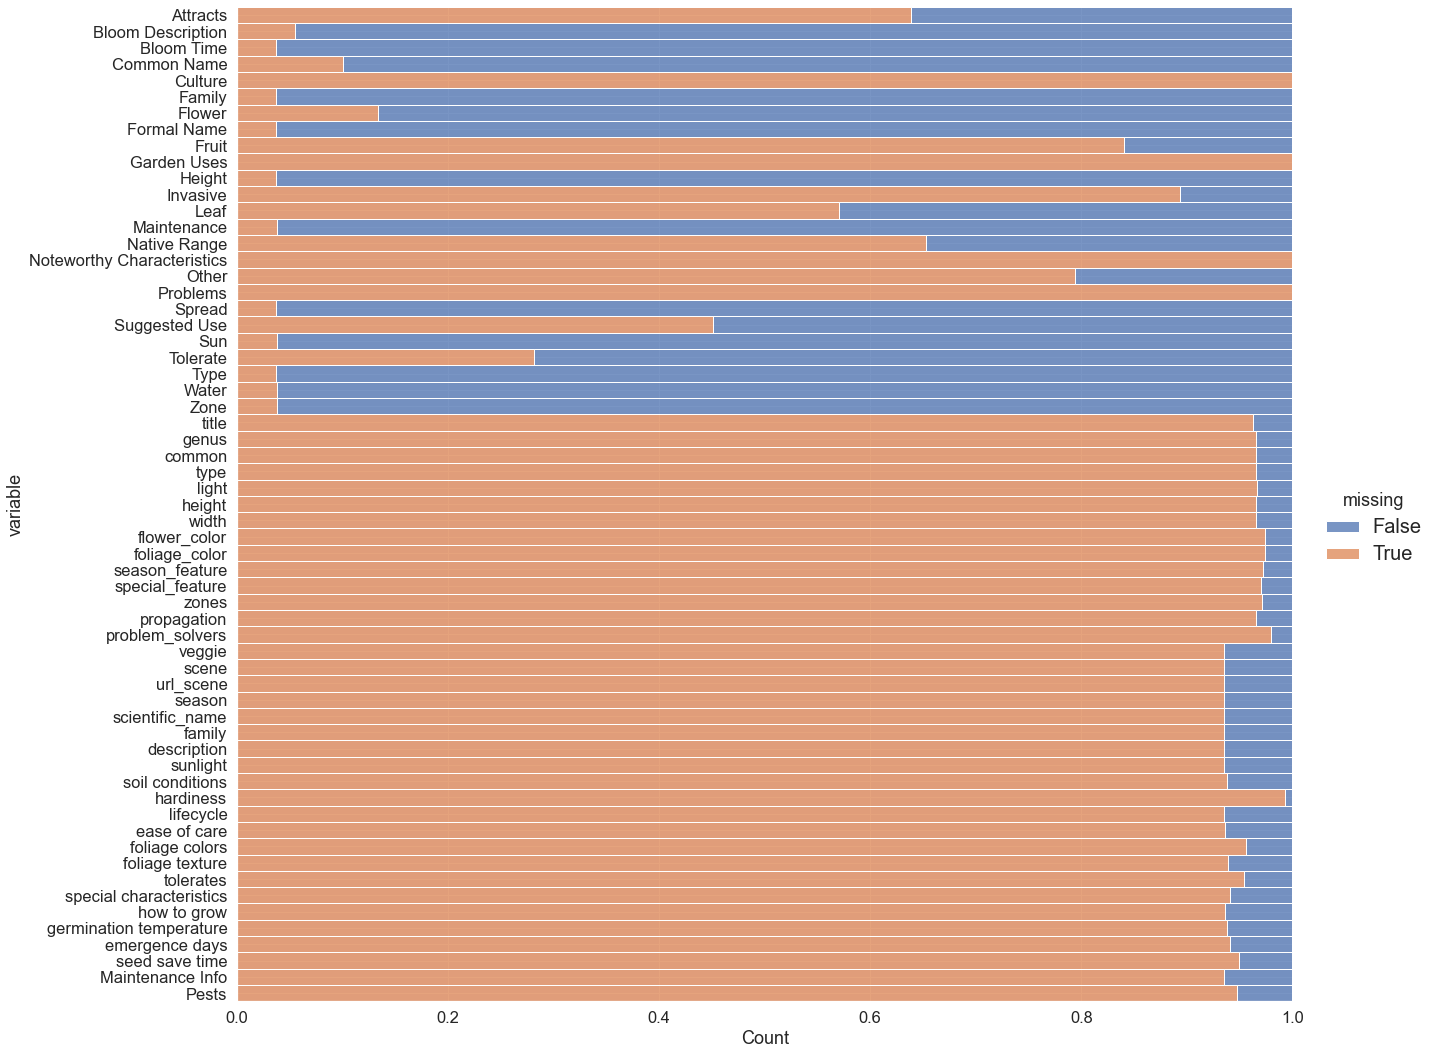

In [28]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
x= sns.displot(
    data=whole.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    height=15
)
plt.setp(x._legend.get_texts(), fontsize=20)

In [13]:
whole['Common Name'].unique().size

3092

In [14]:
sun = pd.concat([whole[whole['sunlight'].notna()]['sunlight'].str.lower().str.strip(), whole[whole['Sun'].notna()]['Sun'].str.lower().str.strip()], ignore_index=True)
sun.replace(regex=['\n'], value=' to ',inplace=True)
sun_df = sun.to_frame(name = 'sun_type')

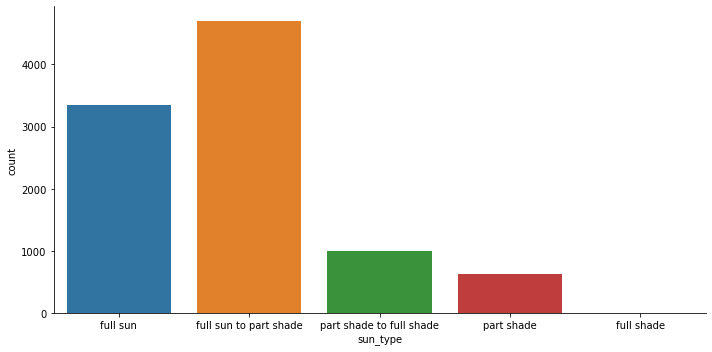

In [15]:
sns.catplot(x="sun_type", 
            kind="count", 
            data=sun_df,
            height=5,
            aspect=2)

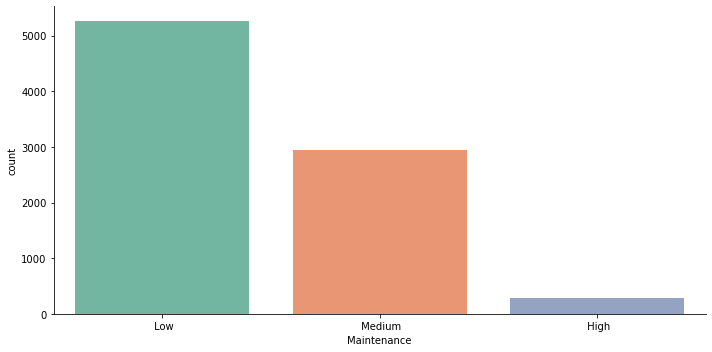

In [108]:
sns.catplot(x="Maintenance", 
            kind="count", 
            data=mbg_df,
            palette="Set2",
            height=5,
            aspect=2)